# Linear Regression and Temperature

In this notebook, we'll look at using linear regression to study changes in temperature.

## Setup

In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%config InlineBackend.figure_format ='retina'

## Getting our data

We'll be getting data from [North America Land Data Assimilation System (NLDAS)](https://wonder.cdc.gov/NASA-NLDAS.html), which provides the daily average temperature from 1979-2011 for the United States.

For the next step, you will need to choose some settings in the data request form. These are:

- GroupBy: Month Day, Year
- Your State
- Export Results (check box)
- Show Zero Values (check box)

>1) Download the data for your home state (or state of your choosing) and upload it to M2 in your work directory.

# Loading our data

In [6]:
df = pd.read_csv('North America Land Data Assimilation System (NLDAS) Daily Air Temperatures and Heat Index (1979-2011).txt',delimiter='\t',skipfooter=14,engine='python')

In [7]:
df

,Notes,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F)
0,NaN,"Jan 01, 1979",1979/01/01,21.91
1,NaN,"Jan 02, 1979",1979/01/02,31.46
2,NaN,"Jan 03, 1979",1979/01/03,31.29
3,NaN,"Jan 04, 1979",1979/01/04,30.93
4,NaN,"Jan 05, 1979",1979/01/05,29.27
...,...,...,...,...
12048,NaN,"Dec 27, 2011",2011/12/27,43.41
12049,NaN,"Dec 28, 2011",2011/12/28,46.21
12050,NaN,"Dec 29, 2011",2011/12/29,44.59
12051,NaN,"Dec 30, 2011",2011/12/30,45.67


### Clean the data

>2) Drop any rows that have the value "Total" in the Notes column, then drop the Notes column

In [9]:
#dfno = df['Month Day, Year'], ['Month Day, Year Code'], ['Avg Daily Max Air Temperature (F)']
#dfno
df = df.drop(df[df.Notes == 'Total'].index)
df

,Notes,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F)
0,NaN,"Jan 01, 1979",1979/01/01,21.91
1,NaN,"Jan 02, 1979",1979/01/02,31.46
2,NaN,"Jan 03, 1979",1979/01/03,31.29
3,NaN,"Jan 04, 1979",1979/01/04,30.93
4,NaN,"Jan 05, 1979",1979/01/05,29.27
...,...,...,...,...
12048,NaN,"Dec 27, 2011",2011/12/27,43.41
12049,NaN,"Dec 28, 2011",2011/12/28,46.21
12050,NaN,"Dec 29, 2011",2011/12/29,44.59
12051,NaN,"Dec 30, 2011",2011/12/30,45.67


>3) Make a column called Date that is in the pandas datetime format

In [10]:
df['Date']=pd.to_datetime(df['Month Day, Year'], errors='raise')
df[['Month Day, Year','Date']]
df

,Notes,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date
0,NaN,"Jan 01, 1979",1979/01/01,21.91,1979-01-01
1,NaN,"Jan 02, 1979",1979/01/02,31.46,1979-01-02
2,NaN,"Jan 03, 1979",1979/01/03,31.29,1979-01-03
3,NaN,"Jan 04, 1979",1979/01/04,30.93,1979-01-04
4,NaN,"Jan 05, 1979",1979/01/05,29.27,1979-01-05
...,...,...,...,...,...
12048,NaN,"Dec 27, 2011",2011/12/27,43.41,2011-12-27
12049,NaN,"Dec 28, 2011",2011/12/28,46.21,2011-12-28
12050,NaN,"Dec 29, 2011",2011/12/29,44.59,2011-12-29
12051,NaN,"Dec 30, 2011",2011/12/30,45.67,2011-12-30


>4) Make columns for 'Year', 'Month', and 'Day' by splitting the column 'Month Day, Year'

In [14]:
df[["YEAR", "DAY"]] = df['Month Day, Year Code'].str.split("/", 1,expand = True)
df[["MONTH", "DAY"]] = df['DAY'].str.split("/",1, expand = True)
df=df.drop(columns=['Month Day, Year', 'Month Day, Year Code'])

In [16]:
df['DateInt']=df['Date'].astype(int)/10e0
df['YEARInt']=df['YEAR'].astype(int)
df['MONTHInt']=df['MONTH'].astype(int)
df

,Notes,Avg Daily Max Air Temperature (F),Date,YEAR,DAY,MONTH,DateInt,YEARInt,MONTHInt
0,NaN,21.91,1979-01-01,1979,01,01,2.839968e+16,1979,1
1,NaN,31.46,1979-01-02,1979,02,01,2.840832e+16,1979,1
2,NaN,31.29,1979-01-03,1979,03,01,2.841696e+16,1979,1
3,NaN,30.93,1979-01-04,1979,04,01,2.842560e+16,1979,1
4,NaN,29.27,1979-01-05,1979,05,01,2.843424e+16,1979,1
...,...,...,...,...,...,...,...,...,...
12048,NaN,43.41,2011-12-27,2011,27,12,1.324944e+17,2011,12
12049,NaN,46.21,2011-12-28,2011,28,12,1.325030e+17,2011,12
12050,NaN,44.59,2011-12-29,2011,29,12,1.325117e+17,2011,12
12051,NaN,45.67,2011-12-30,2011,30,12,1.325203e+17,2011,12


## Generating a scatter plot

> 4) Use df.plot.scatter to plot 'Date' vs 'Avg Daily Max Air Temperature (F)'. You might want to add figsize=(50,5) as an argument to make it more clear what is happening.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

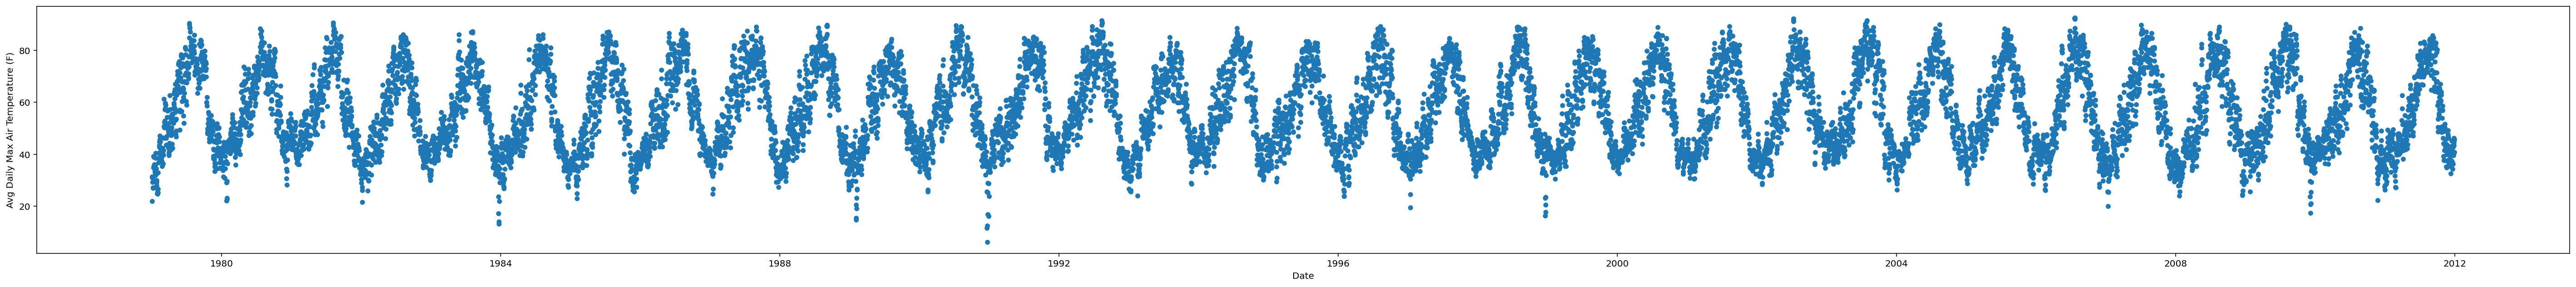

In [17]:
df.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)',figsize=(50,5))

>5) Describe your plot.

Temperature increase and decrease over the selected data (wave).

### Adding colors for our graph

In [19]:
# No need to edit this unless you want to try different colors or a pattern other than colors by month

cmap = matplotlib.cm.get_cmap("nipy_spectral", len(df['MONTHInt'].unique())) # Builds a discrete color mapping using a built in matplotlib color map

c = []
for i in range(cmap.N): # Converts our discrete map into Hex Values
    rgba = cmap(i)
    c.append(matplotlib.colors.rgb2hex(rgba))

df['color']=[c[int(i-1)] for i in df['MONTHInt'].astype(int)] # Adds a column to our dataframe with the color we want for each row

>6) Make the same plot as 4) but add color by adding the argument c=df\['color'\] to our plotting command.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

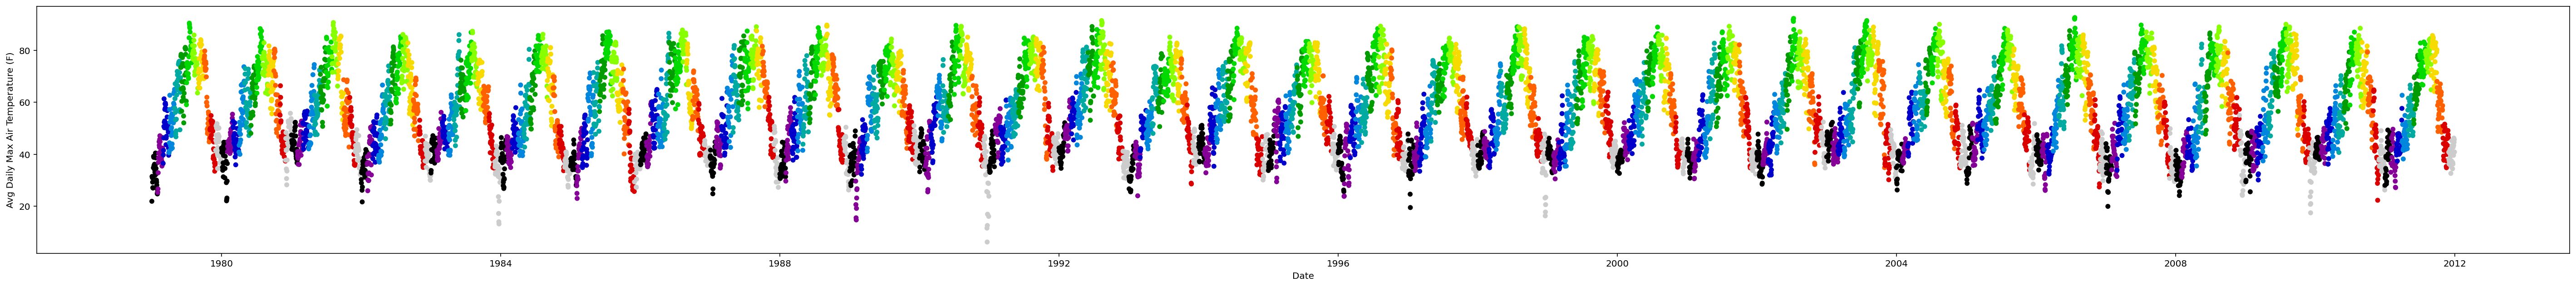

In [20]:
df.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)',figsize=(50,5), c=df['color'])

## Pick a subset of the data

>7) Select a 6 month period from the data. # Hint use logic and pd.datetime(YYYY, MM, DD)

In [24]:
#selected = df[(df['Date'] > '1979-01-01') & (df['Date'] <= '1979-06-01')]
#selected=df[['Avg Daily Max Air Temperature (F)', 'Date', 'color', 'DateInt']][(df['Date'] >=pd.to_datetime('1979-01-01')) & (df['Date'] <= pd.to_datetime('1979-06-01'))]
#selected

df['Date']=pd.to_datetime(df['Date'])
start_date=pd.datetime(1979,1,1)
end_date=pd.datetime(1979,7,1)

In [25]:
selected=df [(df['Date'] >= start_date) & (df['Date'] < end_date)]
selected

,Notes,Avg Daily Max Air Temperature (F),Date,YEAR,DAY,MONTH,DateInt,YEARInt,MONTHInt,color
0,NaN,21.91,1979-01-01,1979,01,01,2.839968e+16,1979,1,#000000
1,NaN,31.46,1979-01-02,1979,02,01,2.840832e+16,1979,1,#000000
2,NaN,31.29,1979-01-03,1979,03,01,2.841696e+16,1979,1,#000000
3,NaN,30.93,1979-01-04,1979,04,01,2.842560e+16,1979,1,#000000
4,NaN,29.27,1979-01-05,1979,05,01,2.843424e+16,1979,1,#000000
...,...,...,...,...,...,...,...,...,...,...
176,NaN,80.47,1979-06-26,1979,26,06,2.992032e+16,1979,6,#009c00
177,NaN,78.46,1979-06-27,1979,27,06,2.992896e+16,1979,6,#009c00
178,NaN,80.56,1979-06-28,1979,28,06,2.993760e+16,1979,6,#009c00
179,NaN,71.37,1979-06-29,1979,29,06,2.994624e+16,1979,6,#009c00


>8) Plot the subset using the the same code you used in 6). You can change the figsize if needed.

In [26]:
cmap = matplotlib.cm.get_cmap("nipy_spectral", len(df['MONTHInt'].unique()))
c=[]
for i in range(cmap.N):
    rgba =cmap(i)
    c.append(matplotlib.colors.rgb2hex(rgba))
selected['color']=[c[int(i-1)] for i in selected['MONTHInt'].astype(int)]


/tmp/ipykernel_3459385/594084950.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected['color']=[c[int(i-1)] for i in selected['MONTHInt'].astype(int)]


<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

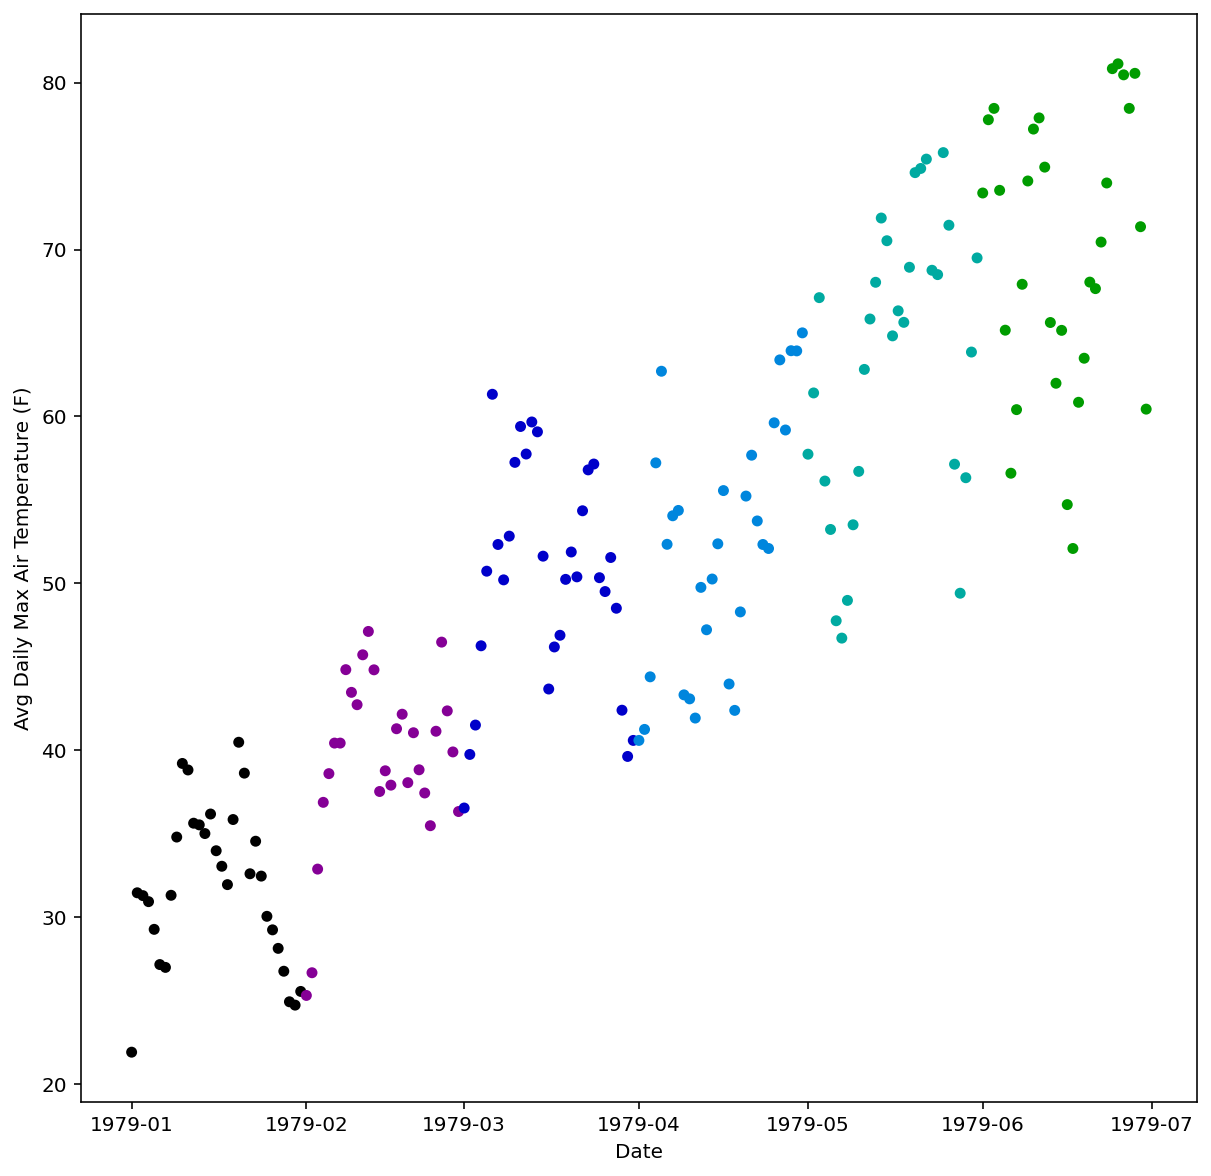

In [28]:
selected.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)', figsize=(10,10), c=selected['color'])

## Linear Regression

We are going to use a very [simple linear regression model](https://en.wikipedia.org/wiki/Simple_linear_regression). You may implement a more complex model if you wish.

The method described here is called the least squares method and is defined as:

$m = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}))}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$

$b = \bar{y} - m\bar{x}$

Where $\bar{x}$ and $\bar{y}$ are the average value of $x$ and $y$ respectively.

First we need to define our X and Y values.

In [33]:
X=selected['DateInt'].values
Y=selected['Avg Daily Max Air Temperature (F)'].values

In [34]:
def lin_reg(x,y):
    # Calculate the average x and y
    x_avg = np.mean(x)
    y_avg = np.mean(y)

    num = 0
    den = 0
    for i in range(len(x)): # This represents our sums
        num = num + (x[i] - x_avg)*(y[i] - y_avg) # Our numerator
        den = den + (x[i] - x_avg)**2 # Our denominator
    # Calculate slope
    m = num / den
    # Calculate intercept
    b = y_avg - m*x_avg

    print (m, b)
    
    # Calculate our predicted y values
    y_pred = m*x + b
    
    return y_pred

In [35]:
Y_pred = lin_reg(X,Y) 

2.865410755604127e-14 -784.8043336773727


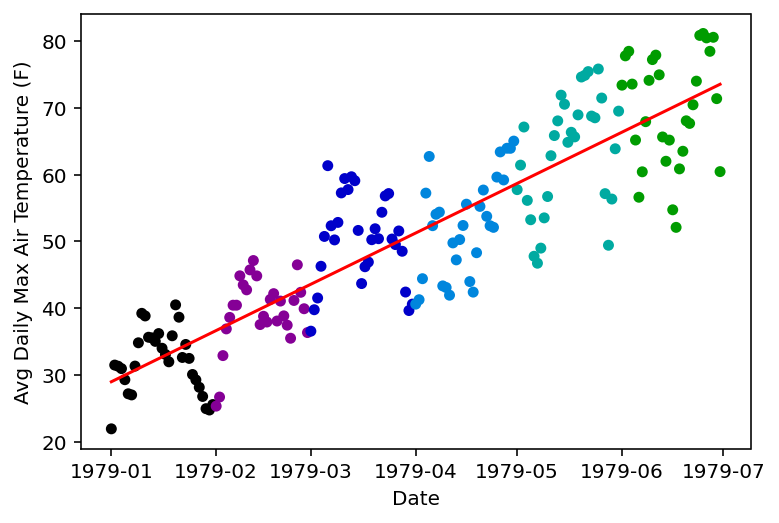

In [39]:
selected.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)',c=selected['color'])
plt.plot([min(selected['Date'].values), max(selected['Date'].values)], [min(Y_pred), max(Y_pred)], color='red') # best fit line
plt.show()

>9) What are the slope and intercept of your best fit line?

2.865410755604127e-14, -784.8043336773727


>10) What are the minimum and maximum Y values of your best fit line? Is your slope positive or negative?

In [49]:
print(min(Y_pred))
print(max(Y_pred))

28.96315159978144
73.52601967093688


## Putting it all together

>11) Generate a best fit line for the full data set and plot the line over top of the data.

In [50]:
X=df['DateInt'].values
Y=df['Avg Daily Max Air Temperature (F)'].values
y_pred = lin_reg(X,Y)

3.425826715240864e-18 56.47860270337164


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.9/site-packages/matplotlib/pyplot.py'>

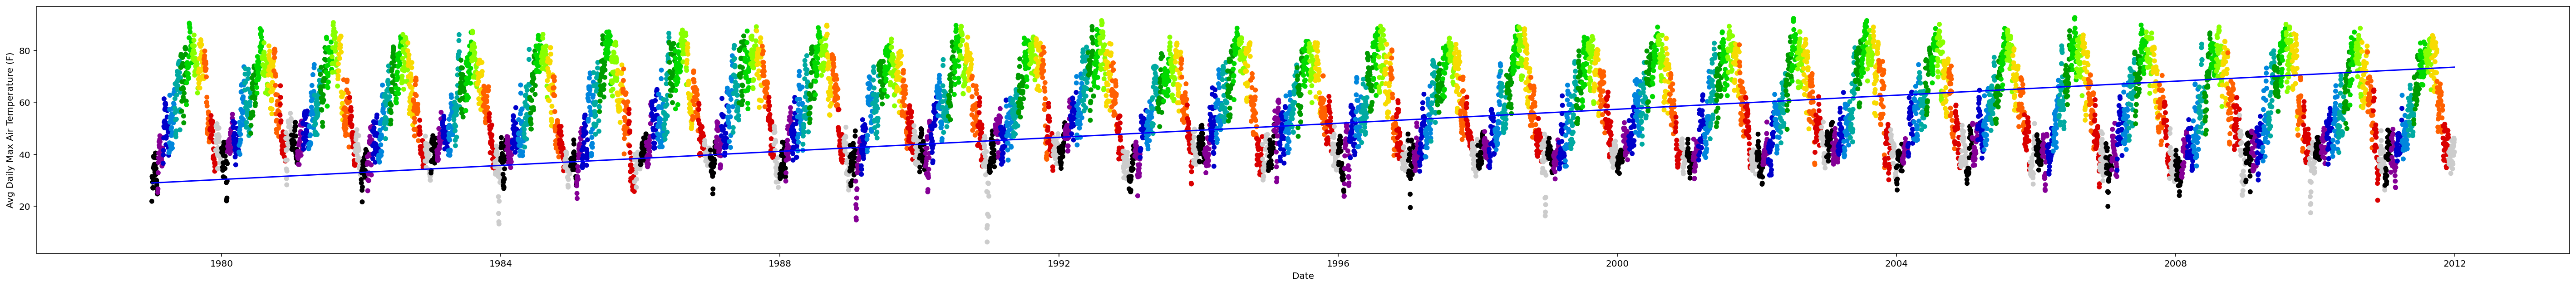

In [51]:
df.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)',c=df['color'],figsize=(50,5))
plt.plot([min(df['Date'].values), max(df['Date'].values)], [min(Y_pred), max(Y_pred)], color='blue')
plt

>12) Is the slope positive or negative? What do you think that means?

Slope is positive; temperatures are rising over time. 